#Q1
Linear Regression is used for predicting a continuous dependent variable based on one or more independent variables. It models the relationship between the dependent variable and the independent variables as a linear equation.

Logistic Regression, on the other hand, is used for predicting the probability of an event occurring. It's particularly useful for binary classification problems. Logistic Regression models the relationship between the independent variables and the log-odds of the probability of the event.

In [2]:
#1
# Let's use the famous Iris dataset for this example
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Linear Regression
X = iris_df[['sepal length (cm)']]
y = iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [3]:
# Logistic Regression
X = iris_df[['sepal length (cm)']]
y = iris_df['target'] > 1  # Binary classification, classifying if the target is 2 or not
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

#Q2
The cost function in logistic regression is the log-likelihood function. The optimization is typically done using iterative optimization algorithms like gradient descent or variants of it.

In [4]:
#2
# Assuming you have X_train, y_train from the previous example
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

#Q3
Regularization helps prevent overfitting by adding a penalty term to the cost function. Common regularization techniques include L1 regularization (Lasso) and L2 regularization (Ridge).

In [6]:
#3
# Using L2 regularization in logistic regression
logistic_model = LogisticRegression(penalty='l2', C=1.0)
logistic_model.fit(X_train, y_train)

LogisticRegression()

#Q4
The ROC curve (Receiver Operating Characteristic) is a graphical representation of the model's ability to discriminate between positive and negative classes.

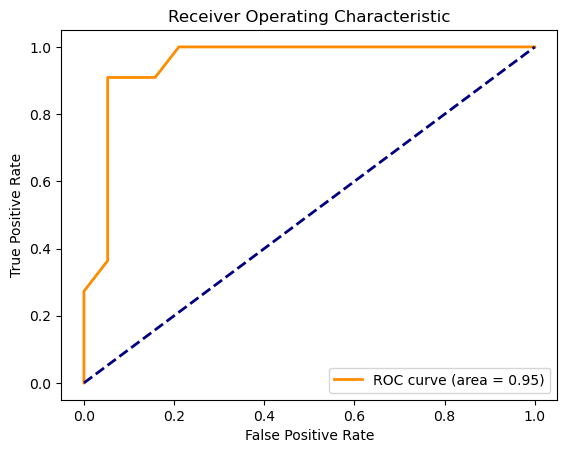

In [7]:
#4
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q5
Feature selection is a crucial step in building effective machine learning models, including logistic regression. Here are some common techniques for feature selection:

Recursive Feature Elimination (RFE): This method recursively removes the least important features and builds the model until the desired number of features is reached.

L1 Regularization (Lasso): L1 regularization adds a penalty term based on the absolute values of the coefficients. This can lead to sparsity in the coefficients, effectively selecting only a subset of features.

Tree-based Methods (e.g., Random Forest Feature Importance): Tree-based models can provide feature importance scores. Features with higher importance are considered more relevant.

Mutual Information: This measures the dependency between variables. Features with high mutual information with the target variable are considered more informative.

In [21]:
#feature selection using Recursive Feature Elimination (RFE) with logistic regression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Use RFE with logistic regression to select features
rfe = RFE(logistic_model, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train logistic regression on the selected features
logistic_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_rfe)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Selected features
selected_features = pd.DataFrame(rfe.support_, index=iris.feature_names, columns=["Selected"])
print("Selected Features:")
print(selected_features[selected_features["Selected"] == True])


Accuracy on the test set: 1.0
Selected Features:
                   Selected
petal length (cm)      True
petal width (cm)       True


Q6
Common strategies include resampling techniques (oversampling minority class, undersampling majority class), using different evaluation metrics (precision, recall, F1-score), and using synthetic data generation methods.

In [15]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 6.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
#6
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Assume binary classification (class 2 vs. not class 2)
y_binary = (y == 2).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create and train a logistic regression model on the resampled data
logistic_model = LogisticRegression()
logistic_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 1.0


Q7
Logistic regression, like any other statistical model, comes with its set of challenges. Here are some common issues and challenges that may arise when implementing logistic regression and potential solutions:

Multicollinearity:

Issue: Multicollinearity occurs when two or more independent variables in the model are highly correlated, making it challenging to separate their individual effects on the dependent variable.

Solution:Identify highly correlated variables and consider removing one of them.
Use regularization techniques (e.g., L2 regularization) to penalize large coefficients.

Overfitting:

Issue: Overfitting happens when the model fits the training data too closely, capturing noise and making it perform poorly on new, unseen data.

Solution:Use regularization techniques (L1 or L2 regularization) to penalize complex models.
Cross-validation to assess the model's performance on different subsets of the data.

Underfitting:

Issue: Underfitting occurs when the model is too simple to capture the underlying patterns in the data.

Solution:
Increase model complexity by adding more relevant features.
Try more sophisticated models.

Imbalanced Classes:

Issue: Logistic regression assumes a balanced dataset, and imbalanced classes can lead to biased models.

Solution:Use techniques like oversampling the minority class or undersampling the majority class.
Adjust class weights in the logistic regression model.

Non-linearity:

Issue: Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable.

Solution:Transform variables or create interaction terms to capture non-linear relationships.
Use more complex models like decision trees or polynomial regression.

Outliers:

Issue: Outliers can have a significant impact on logistic regression coefficients.

Solution:Identify and handle outliers, either by removing them or transforming the data.
Use robust regression techniques that are less sensitive to outliers.

Heteroscedasticity:

Issue: Heteroscedasticity occurs when the variability of the errors is not constant across all levels of the independent variables.

Solution:
Transform the dependent variable or the independent variables to stabilize variance.
Use weighted least squares regression to give less weight to observations with higher variance.

Perfect Separation:

Issue: Perfect separation occurs when the logistic regression model perfectly predicts the outcome for some observations, leading to infinite coefficients.

Solution:
Remove or combine predictors causing perfect separation.
Use penalized models like Firth logistic regression.